In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
# pd.set_option('max_columns', 200)

In [4]:
# load the data
df=pd.read_csv('coaster_db.csv')



In [5]:
# Understand the data
# df.info()
#df.describe()
df.notnull().any()
df.shape
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [6]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

**Data Preparation**

In [7]:
df=df[['coaster_name',
        # 'Length', 'Speed', 
        'Location', 'Status', 
        # 'Opening date',
    #    'Type',
     'Manufacturer', 
    #  'Height restriction', 'Model', 'Height',
    #    'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
    #    'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
    #    'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
    #    'Track layout', 'Fastrack available', 'Soft opening date.1',
    #    'Closing date', 'Opened', 'Replaced by', 'Website',
    #    'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
    #    'Single rider line available', 'Restraint Style',
    #    'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude','Type_Main',
       'opening_date_clean', 
    #    'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
    #    'height_value', 'height_unit', 
        'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [8]:
df.dtypes

coaster_name           object
Location               object
Status                 object
Manufacturer           object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [9]:
#  DATATYPE comversion
df['opening_date_clean']=pd.to_datetime(df['opening_date_clean'])
# pd.to_numeric()

In [10]:
# Checking Null Values
df.isna().sum()

# Removing duplicated values
df=df.loc[~df.duplicated(subset=['coaster_name'])].reset_index(drop=True)

df.shape

(990, 13)

In [11]:
# Renaming Colunms
df=df.rename(columns={
'coaster_name'       : 'Coaster_Name' ,
# 'Location'           :  ,
# 'Status'             :  ,
# 'Manufacturer'       :  ,
'year_introduced'    : 'Year_Introduced' ,
'latitude'           : 'Latitude' ,
'longitude'          : 'Longitude' ,
# 'Type_Main'          :  ,
'opening_date_clean' : 'Opening_Date_Clean' ,
'speed_mph'          : 'Speed_mph',
'height_ft'          : 'Height_ft'
# 'Inversions_clean'   : ,
# 'Gforce_clean'       :  ,
})


**Feature Understanding**
(univariate analysis)

Text(0, 0.5, 'Number of roller coasters')

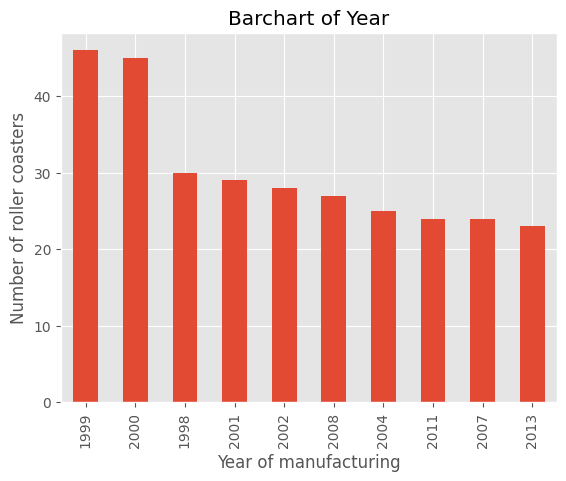

In [12]:
#ploting feature to understand

ax=df['Year_Introduced'].value_counts(). \
    head(10).\
    plot(kind='bar', title="Barchart of Year")

ax.set_xlabel('Year of manufacturing')
ax.set_ylabel('Number of roller coasters')



Text(0.5, 0, 'Speed(mph)')

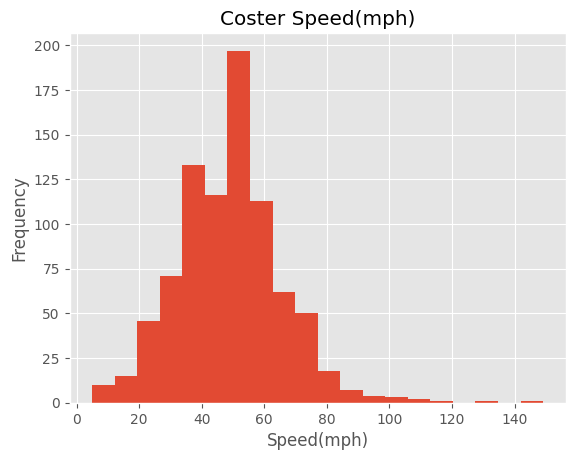

In [26]:
dx=df['Speed_mph'].plot(kind='hist',bins=20, title='Coster Speed(mph)')
dx.set_xlabel('Speed(mph)')


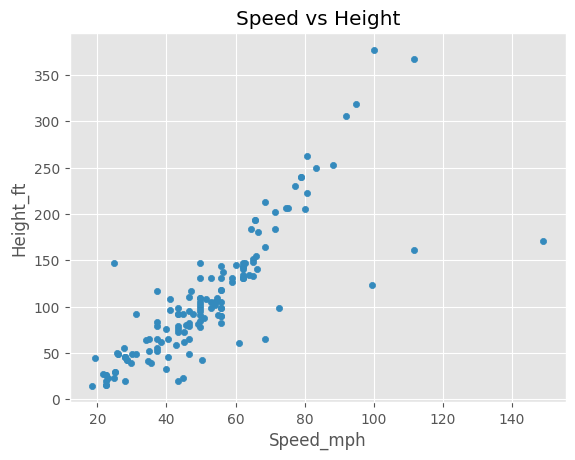

In [34]:
df.plot(kind='scatter',x='Speed_mph',y='Height_ft',title='Speed vs Height')
plt.show()

<AxesSubplot:title={'center':'Speed vs Height'}, xlabel='Speed_mph', ylabel='Height_ft'>

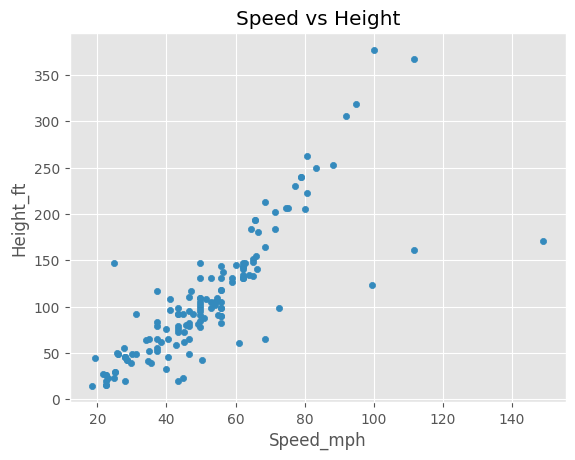

In [35]:
df.plot(kind='scatter',x='Speed_mph',y='Height_ft',title='Speed vs Height')


<AxesSubplot:xlabel='Speed_mph', ylabel='Height_ft'>

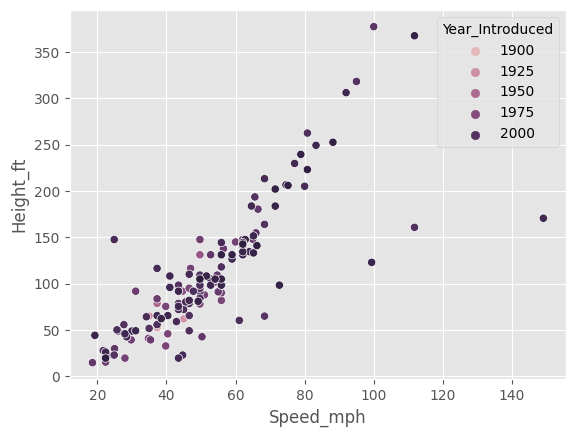

In [24]:
sns.scatterplot(x='Speed_mph',
                y='Height_ft',
                hue='Year_Introduced',
                data=df)

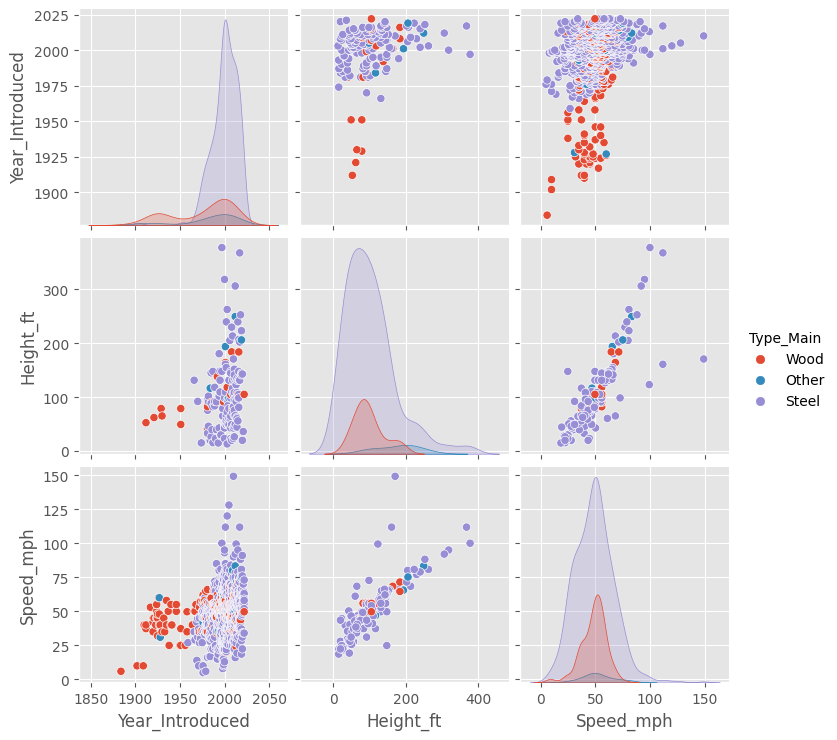

In [36]:
sns.pairplot(data=df,vars=['Year_Introduced','Height_ft','Speed_mph'],hue='Type_Main')

In [43]:
df_corr=df.dropna().corr()

<AxesSubplot:>

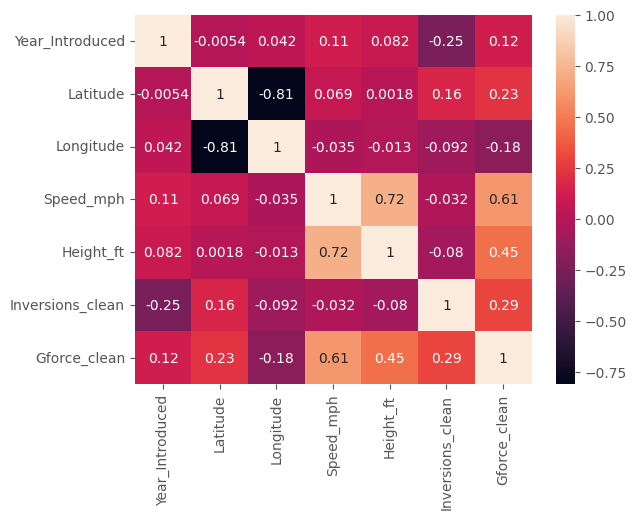

In [45]:
sns.heatmap(df_corr,annot=True)